In [6]:
import json
import pandas as pd
from pandas import json_normalize
import os
print(os.getcwd())
import sys
sys.path.append("/home/wafa/recherche/readability/src")
#from utils_data import load_data, all_annotation
from matplotlib import pyplot as plt
import seaborn as sns

/home/waissa/recherche/readability/notebooks


In [8]:
classe2CECR = {"Très Facile": "A1", "Facile": "A2", "Accessible": "B1", "+Complexe": "B2"}

In [7]:
with open('%s/%s' %('../data', 'annotations_4.json'), 'r') as f:
    json_data = json.load(f)
local_df = pd.DataFrame(json_data)

In [9]:
global_df = pd.read_csv('%s/%s' %('../data', 'Qualtrics_Annotations_B.csv'), delimiter="\t", index_col="text_indice")
global_df = global_df[~global_df.index.duplicated(keep='first')]
global_df = global_df[['text', 'gold_score_20_label']]
global_df['classe'] = global_df['gold_score_20_label'].map(classe2CECR)

In [19]:
# annotations file
with open('%s/%s' %('../data', 'annotations_4.json'), 'r') as f:
    json_data = json.load(f)

    
#Qualtrics file, it has to have the mapping of the classe from string to CECR
classe2CECR = {"Très Facile": "A1", "Facile": "A2", "Accessible": "B1", "+Complexe": "B2"}
global_df = pd.read_csv('%s/%s' %('../data', 'Qualtrics_Annotations_B.csv'), delimiter="\t", index_col="text_indice")
global_df = global_df[~global_df.index.duplicated(keep='first')]
global_df = global_df[['text', 'gold_score_20_label']]
global_df['classe'] = global_df['gold_score_20_label'].map(classe2CECR)



new_json = []
for local_text in json_data:
    new_data = {'annotations': []}
    matching_indexes = global_df[global_df['text'] == local_text['text']].index.tolist()
    new_data['text'] = global_df.loc[matching_indexes[0]]['classe'] + ' ' + local_text['text']
    for annot in local_text['annotations']:
        new_data['annotations'].append({'text': annot['text'], 'start': annot['start']+3, 'end': annot['end']+3, 'label': annot['label'], 'annotators': annot['annotators'], 'confidence': annot['confidence'] })
    new_json.append(new_data)

In [2]:
global_df, local_df = load_data(file_path='../data', global_file='Qualtrics_Annotations_B.csv', local_file='annotations_completes.xlsx')
local_df

,text,annotations,gold_score_20_label,classe
text_indice,,,,
422,« Sortir du syndrome Tarzan » La brigade an...,"[{'text': 'collectif', 'label': 'Mot difficile...",Accessible,B1
1735,Les cultures en Afrique du Nord Les trois p...,"[{'text': 'céréales', 'label': 'Graphie, probl...",Facile,A2
2084,Bienvenue à Gardanne Gardanne est une ville...,"[{'text': 'département', 'label': 'Graphie, pr...",Facile,A2
438,Le 8 octobre c’est la première journée paralym...,"[{'text': 'Andrew Parsons,', 'label': 'Mot dif...",Facile,A2
133,Une destination à conseiller pour les vacances...,"[{'text': 'conseils', 'label': 'Graphie, probl...",Accessible,B1
...,...,...,...,...
1181,Démonstration Ikebana 1 variation et 1 créa...,"[{'text': 'Démonstration', 'label': 'Graphie, ...",Facile,A2
942,Une drôle de journée Et me voilà repartie p...,"[{'text': 'Flûte!', 'label': 'Figure de style,...",Facile,A2
172,"L'adolescence ailleurs En Amérique, en Asie...","[{'text': 'L'adolescence', 'label': 'Graphie, ...",Facile,A2


In [3]:
dicos = [{'term': 'collectif', 'Mot difficile ou inconnu': '0'}, {'term': 'faciès', 'Mot difficile ou inconnu': '1'}, {'term': 'syndrome', 'Mot difficile ou inconnu': '1'}, {'term': 'syndrome Tarzan', 'Mot difficile ou inconnu': '1'}, {'term': "d'incitation", 'Mot difficile ou inconnu': '1'}, {'term': "d'incitation à la haine raciale", 'Mot difficile ou inconnu': '1'}, {'term': 'enchaîné', 'Mot difficile ou inconnu': '0'}, {'term': "s'est formée", 'Mot difficile ou inconnu': '0'}, {'term': 'anti-négrophobie', 'Mot difficile ou inconnu': '1'}, {'term': 'discriminations', 'Mot difficile ou inconnu': '0'}, {'term': 'discriminations raciales', 'Mot difficile ou inconnu': '1'}]

In [6]:
predictions

,text,Mot difficile ou inconnu
text_indice,,
422,« Sortir du syndrome Tarzan » La brigade an...,"[{'term': 'collectif', 'Mot difficile ou incon..."
1735,Les cultures en Afrique du Nord Les trois p...,None
2084,Bienvenue à Gardanne Gardanne est une ville...,None
438,Le 8 octobre c’est la première journée paralym...,None
133,Une destination à conseiller pour les vacances...,None
...,...,...
1181,Démonstration Ikebana 1 variation et 1 créa...,None
942,Une drôle de journée Et me voilà repartie p...,None
172,"L'adolescence ailleurs En Amérique, en Asie...",None


In [8]:
predictions = local_df[['text']].copy()
predictions['Mot difficile ou inconnu'] = None
predictions.at[422, 'Mot difficile ou inconnu'] = dicos


In [3]:
global_df.index

Index([ 422, 1735, 2084,  438,  133, 1126, 1994,  235, 1932, 1931,
       ...
       1696,  920, 1806, 2074, 1474, 1181,  942,  172,  664, 1763],
      dtype='int64', name='text_indice', length=461)

In [14]:
for i, row in xlsx_local_df.iterrows():
    print(len(row.annotations))
    print(len([dict(t) for t in set(tuple(d.items()) for d in row.annotations)]))
    break

24
21


In [15]:
[dict(t) for t in set(tuple(d.items()) for d in row.annotations)]

[{'text': 'RDV', 'label': 'Graphie, problème de déchiffrage'},
 {'text': "A l'écoute des désirs de lecture de chacun et chacune",
  'label': "Trop d'informations secondaires"},
 {'text': 'Gaëlle Pingault a eu l\'occasion de rencontrer l\'ensemble des groupes d\'adultes "lecteurs débutants" (ENEFA, EPE et PIAF) qui participent au projet, et vont collaborer au travail d\'écriture de ce premier texte en "facile à lire".',
  'label': 'Ordre syntaxique inhabituel'},
 {'text': 'trame', 'label': 'Mot difficile ou inconnu'},
 {'text': 'semaine de résidence,', 'label': 'Mot difficile ou inconnu'},
 {'text': 'narration', 'label': 'Mot difficile ou inconnu'},
 {'text': 'intimes,', 'label': 'Mot difficile ou inconnu'},
 {'text': 'résidence', 'label': 'Référence culturelle difficile'},
 {'text': 'forte de toutes ces rencontres,',
  'label': "Trop d'informations secondaires"},
 {'text': 'sur leurs désirs de lecture,',
  'label': "Trop d'informations secondaires"},
 {'text': '(ENEFA, EPE et PIAF)', '

In [28]:
xlsx_local_df['classe'].value_counts()

classe
A2    211
B1    198
B2     32
A1     19
Name: count, dtype: int64

In [29]:
xlsx_local_df.columns

Index(['text', 'annotations', 'text_indice', 'gold_score_20_label', 'classe'], dtype='object')

In [19]:
set(tuple(row.annotations[0].items()))

{('label', 'Graphie, problème de déchiffrage'), ('text', '#Episode1')}

In [24]:
len(preprocessed_data)

21

In [25]:
preprocessed_data

[{'text': 'Episode1', 'label': 'Graphie, problème de déchiffrage'},
 {'text': 'intimes', 'label': 'Mot difficile ou inconnu'},
 {'text': 'baignés de', 'label': 'Mot difficile ou inconnu'},
 {'text': 'technique', 'label': 'Graphie, problème de déchiffrage'},
 {'text': 'narration', 'label': 'Mot difficile ou inconnu'},
 {'text': "A l'écoute des désirs de lecture de chacun et chacune",
  'label': "Trop d'informations secondaires"},
 {'text': 'sur leurs désirs de lecture',
  'label': "Trop d'informations secondaires"},
 {'text': 'semaine de résidence', 'label': 'Mot difficile ou inconnu'},
 {'text': 'résidence', 'label': 'Référence culturelle difficile'},
 {'text': 'forte de toutes ces rencontres',
  'label': "Trop d'informations secondaires"},
 {'text': 'forte de toutes ces rencontres, et prête à se mettre au travail, pour proposer bientôt une première trame de son texte',
  'label': 'Ordre syntaxique inhabituel'},
 {'text': 'RDV', 'label': 'Graphie, problème de déchiffrage'},
 {'text': '

In [13]:
row.annotations

[{'text': '#Episode1', 'label': 'Graphie, problème de déchiffrage'},
 {'text': 'intimes,', 'label': 'Mot difficile ou inconnu'},
 {'text': 'baignés de', 'label': 'Mot difficile ou inconnu'},
 {'text': '"technique"', 'label': 'Graphie, problème de déchiffrage'},
 {'text': 'narration', 'label': 'Mot difficile ou inconnu'},
 {'text': "A l'écoute des désirs de lecture de chacun et chacune",
  'label': "Trop d'informations secondaires"},
 {'text': 'sur leurs désirs de lecture,',
  'label': "Trop d'informations secondaires"},
 {'text': 'semaine de résidence,', 'label': 'Mot difficile ou inconnu'},
 {'text': 'résidence', 'label': 'Référence culturelle difficile'},
 {'text': 'forte de toutes ces rencontres,',
  'label': "Trop d'informations secondaires"},
 {'text': 'forte de toutes ces rencontres, et prête à se mettre au travail, pour proposer bientôt une première trame de son texte.',
  'label': 'Ordre syntaxique inhabituel'},
 {'text': 'RDV', 'label': 'Graphie, problème de déchiffrage'},
 {'

In [115]:
xlsx_local_df.loc[422].annotations

[{'text': 'collectif',
  'start': 209,
  'end': 218,
  'label': 'Mot difficile ou inconnu',
  'annotators': ['VAV'],
  'confidence': 0.33},
 {'text': 'faciès.',
  'start': 619,
  'end': 626,
  'label': 'Mot difficile ou inconnu',
  'annotators': ['EMD', 'VAV', 'VIL'],
  'confidence': 1.0},
 {'text': 'antiraciste.',
  'start': 78,
  'end': 90,
  'label': 'Graphie, problème de déchiffrage',
  'annotators': ['VIL'],
  'confidence': 0.33},
 {'text': "elle ne s'en donne pas les moyens.",
  'start': 747,
  'end': 781,
  'label': 'Ordre syntaxique inhabituel',
  'annotators': ['VAV'],
  'confidence': 0.33},
 {'text': 'moyens.',
  'start': 774,
  'end': 781,
  'label': 'Graphie, problème de déchiffrage',
  'annotators': ['EMD'],
  'confidence': 0.33},
 {'text': 'actions?',
  'start': 155,
  'end': 163,
  'label': 'Graphie, problème de déchiffrage',
  'annotators': ['EMD'],
  'confidence': 0.33},
 {'text': 'syndrome',
  'start': 12,
  'end': 20,
  'label': 'Mot difficile ou inconnu',
  'annotat

In [41]:
global_df, json_local_df = load_data(file_path='../data', global_file='Qualtrics_Annotations_B.csv', local_file='annotations_.json')

Index(['text', 'annotations'], dtype='object')


In [42]:
json_local_df.set_index("text_indice", inplace=True)

In [100]:
a = json_local_df.iloc[0].annotations

In [104]:
json_local_df

,text,annotations,gold_score_20_label,classe
text_indice,,,,
422,« Sortir du syndrome Tarzan » La brigade an...,"[{'text': 'collectif', 'start': 209, 'end': 21...",Accessible,B1
1735,Les cultures en Afrique du Nord Les trois p...,"[{'text': 'céréales', 'start': 388, 'end': 396...",Facile,A2
2084,Bienvenue à Gardanne Gardanne est une ville...,"[{'text': 'département', 'start': 62, 'end': 7...",Facile,A2
438,Le 8 octobre c’est la première journée paralym...,"[{'text': 'Andrew Parsons,', 'start': 611, 'en...",Facile,A2
133,Une destination à conseiller pour les vacances...,"[{'text': 'conseils', 'start': 644, 'end': 652...",Accessible,B1
...,...,...,...,...
1181,Démonstration Ikebana 1 variation et 1 créa...,"[{'text': 'Démonstration', 'start': 0, 'end': ...",Facile,A2
942,Une drôle de journée Et me voilà repartie p...,"[{'text': 'Flûte!', 'start': 792, 'end': 798, ...",Facile,A2
172,"L'adolescence ailleurs En Amérique, en Asie...","[{'text': 'L'adolescence', 'start': 0, 'end': ...",Facile,A2


In [103]:
[b for b in a if 'arzan' in b['text']]

[{'text': 'syndrome Tarzan.',
  'start': 1268,
  'end': 1284,
  'label': 'Mot difficile ou inconnu',
  'annotators': ['VAV'],
  'confidence': 0.33},
 {'text': 'Tarzan.',
  'start': 1277,
  'end': 1284,
  'label': 'Référence culturelle difficile',
  'annotators': ['EMD'],
  'confidence': 0.33},
 {'text': 'Tarzan »',
  'start': 21,
  'end': 29,
  'label': 'Référence culturelle difficile',
  'annotators': ['EMD'],
  'confidence': 0.33}]

In [107]:
json_data

[{'text': "« Sortir du syndrome Tarzan »    La brigade anti-négrophobie est un collectif antiraciste. Il existe depuis 2005. Pourquoi ce collectif ? Quelles sont ses actions? Explications avec Franco, le porte-parole du collectif.    Qu'est-ce que la négrophobie?  Tout ce qui est en rapport avec la peur, la haine, le mépris, le rejet des personnes et des cultures noires.    Comment s'est formée la brigade anti-négrophobie?   La brigade est née en 2005. Des incendies ont eu lieu en région parisienne. Ils ont révélé des discriminations raciales. Puis il y a eu la mort de Zyed et Bouna. Cela a posé la question du contrôle au faciès. Pourquoi les Noirs et les Arabes sont plus touchés par le contrôle au faciès ? La France veut combattre le racisme mais elle ne s'en donne pas les moyens.    Quelles ont été vos actions?  En 2005, on a occupé le plateau de Canal+. On a demandé la démission de l'animateur Marc Olivier Fogiel. Il avait été reconnu coupable d'incitation à la haine raciale. On s'e

In [110]:
for row in json_data:
    for i, d1 in enumerate(row['annotations']):
        for j, d2 in enumerate(row['annotations']):
            if i != j and d1['text'] in d2['text'] and d1['label'] == d2['label']:
                print(d1, d2)
                break 

{'text': 'syndrome', 'start': 12, 'end': 20, 'label': 'Mot difficile ou inconnu', 'annotators': ['EMD', 'VAV', 'VIL'], 'confidence': 1.33} {'text': 'syndrome Tarzan.', 'start': 1268, 'end': 1284, 'label': 'Mot difficile ou inconnu', 'annotators': ['VAV'], 'confidence': 0.33}
{'text': "d'incitation", 'start': 950, 'end': 962, 'label': 'Mot difficile ou inconnu', 'annotators': ['EMD'], 'confidence': 0.33} {'text': "d'incitation à la haine raciale.", 'start': 950, 'end': 982, 'label': 'Mot difficile ou inconnu', 'annotators': ['VAV'], 'confidence': 0.33}
{'text': 'brigade', 'start': 36, 'end': 43, 'label': 'Graphie, problème de déchiffrage', 'annotators': ['EMD'], 'confidence': 0.33} {'text': 'brigade anti-négrophobie', 'start': 390, 'end': 414, 'label': 'Graphie, problème de déchiffrage', 'annotators': ['EMD'], 'confidence': 0.33}
{'text': 'discriminations', 'start': 513, 'end': 528, 'label': 'Mot difficile ou inconnu', 'annotators': ['VIL'], 'confidence': 0.33} {'text': 'discriminations

Index(['text', 'annotations'], dtype='object')


In [45]:
xlsx_local_df.set_index("text_indice", inplace=True)

In [46]:
xlsx_local_df = json_local_df.loc[json_local_df.index]

In [47]:
json_local_df

,text,annotations,gold_score_20_label,classe
text_indice,,,,
422,« Sortir du syndrome Tarzan » La brigade an...,"[{'text': 'collectif', 'start': 209, 'end': 21...",Accessible,B1
1735,Les cultures en Afrique du Nord Les trois p...,"[{'text': 'céréales', 'start': 388, 'end': 396...",Facile,A2
2084,Bienvenue à Gardanne Gardanne est une ville...,"[{'text': 'département', 'start': 62, 'end': 7...",Facile,A2
438,Le 8 octobre c’est la première journée paralym...,"[{'text': 'Andrew Parsons,', 'start': 611, 'en...",Facile,A2
133,Une destination à conseiller pour les vacances...,"[{'text': 'conseils', 'start': 644, 'end': 652...",Accessible,B1
...,...,...,...,...
1181,Démonstration Ikebana 1 variation et 1 créa...,"[{'text': 'Démonstration', 'start': 0, 'end': ...",Facile,A2
942,Une drôle de journée Et me voilà repartie p...,"[{'text': 'Flûte!', 'start': 792, 'end': 798, ...",Facile,A2
172,"L'adolescence ailleurs En Amérique, en Asie...","[{'text': 'L'adolescence', 'start': 0, 'end': ...",Facile,A2


In [40]:
xlsx_local_df

,text,annotations,gold_score_20_label,classe
text_indice,,,,
229,#Episode1 : C'est parti !! La première rencont...,"[{'text': '#Episode1', 'label': 'Graphie, prob...",Accessible,B1
1061,"- Lavage avec action mécanique, rinçage et ess...","[{'text': 'action mécanique', 'label': 'Mot di...",Accessible,B1
2099,"09 janvier Stretching #1 LE STRETCHING, ON...","[{'text': 'Inspirez', 'label': 'Mot difficile ...",Facile,A2
1155,1 NUITÉE GRATUITE À OOSTENDE - Rien ne pres...,"[{'text': 'Mercator,', 'label': 'Référence cul...",Facile,A2
2107,10 janvier FOOD Tinto verano Idéal pour u...,"[{'text': 'Kcal:', 'label': 'Référence culture...",Facile,A2
...,...,...,...,...
190,Étudiants en Europe: bons plans pour se loger...,[{'text': 'le Stiftelsen Stockhomls Studentbos...,Accessible,B1
1477,Évènements nationaux Les évènement nationa...,"[{'text': 'Évènements nationaux', 'label': 'Gr...",Facile,A2
7,"Êtes-vous tendance ? 1. Pour vous, un logem...","[{'text': 'tissus ethniques.', 'label': 'Mot d...",Facile,A2


In [52]:
import pandas as pd
def make_hashable(d):
    return tuple(sorted(
        (k, tuple(v) if isinstance(v, list) else v)
        for k, v in d.items()
    ))
    
mismatches = {}

for idx in xlsx_local_df.index:
    list1 = xlsx_local_df.at[idx, 'annotations']
    list2 = json_local_df.at[idx, 'annotations']

    # Convert to hashable form
    set1 = {make_hashable(d) for d in list1}
    set2 = {make_hashable(d) for d in list2}

    # Find differences
    only_in_df1 = set1 - set2
    only_in_df2 = set2 - set1

    if only_in_df1 or only_in_df2:
        mismatches[idx] = {
            'only_in_df1': [dict(t) for t in only_in_df1],
            'only_in_df2': [dict(t) for t in only_in_df2]
        }


In [58]:
mismatches

{}

In [4]:
count = 0
with open('%s/%s' %('../data', 'annotations.json'), 'r') as f:
    json_data = json.load(f)
for i in json_data:
    for annot in i['annotations']:
        nb = len(annot["annotators"])
        count += nb
count

10335

In [ ]:
10335

In [5]:
10459 - 10335

124

In [21]:
local_df = pd.read_excel('%s/%s' % ('../data', 'annotations_completes.xlsx'))
local_df

,Username,FormID,Text,TextNumber,AnnotatedTerm,TermIndex,TermLabel,OtherType,AdditionnalInfo,Characters
0,VAV,1_1,« Sortir du syndrome Tarzan » La brigade an...,1,collectif,10,Mot difficile ou inconnu,NaN,NaN,68-77
1,VAV,1_1,« Sortir du syndrome Tarzan » La brigade an...,1,faciès.,101,Mot difficile ou inconnu,NaN,NaN,619-626
2,VIL,1_1,« Sortir du syndrome Tarzan » La brigade an...,1,faciès.,101,Mot difficile ou inconnu,NaN,NaN,619-626
3,EMD,1_1,« Sortir du syndrome Tarzan » La brigade an...,1,faciès.,101,Mot difficile ou inconnu,NaN,NaN,619-626
4,VIL,1_1,« Sortir du syndrome Tarzan » La brigade an...,1,antiraciste.,11,"Graphie, problème de déchiffrage",NaN,NaN,78-90
...,...,...,...,...,...,...,...,...,...,...
10454,VIL,14_2,Recette pour faire de l’eau aromatisée Maté...,16,Ingrédients,35,Mot difficile ou inconnu,NaN,NaN,180-191
10455,VAV,14_2,Recette pour faire de l’eau aromatisée Maté...,16,brin,44,Mot difficile ou inconnu,NaN,NaN,235-239
10456,VIL,14_2,Recette pour faire de l’eau aromatisée Maté...,16,millilitres,48,Mot difficile ou inconnu,NaN,NaN,255-266
10457,VIL,14_2,Recette pour faire de l’eau aromatisée Maté...,16,aromatisée,6,"Graphie, problème de déchiffrage",NaN,NaN,28-38


In [59]:
global_df, local_df = load_data(file_path='../data', global_file='Qualtrics_Annotations_B.csv', local_file='annotations_completes.xlsx')

Index(['text', 'annotations'], dtype='object')


In [68]:
global_df

,text,gold_score_20_label,classe
text_indice,,,
422,« Sortir du syndrome Tarzan » La brigade an...,Accessible,B1
1735,Les cultures en Afrique du Nord Les trois p...,Facile,A2
2084,Bienvenue à Gardanne Gardanne est une ville...,Facile,A2
438,Le 8 octobre c’est la première journée paralym...,Facile,A2
133,Une destination à conseiller pour les vacances...,Accessible,B1
...,...,...,...
1181,Démonstration Ikebana 1 variation et 1 créa...,Facile,A2
942,Une drôle de journée Et me voilà repartie p...,Facile,A2
172,"L'adolescence ailleurs En Amérique, en Asie...",Facile,A2


In [71]:
global_df.loc[229]

text                   #Episode1 : C'est parti !! La première rencont...
gold_score_20_label                                           Accessible
classe                                                                B1
Name: 229, dtype: object

In [70]:
local_df.loc[0]['text']

'#Episode1 : C\'est parti !! La première rencontre avec les groupes    Lors de la première semaine de résidence, du 7 au 9 avril, Gaëlle Pingault a eu l\'occasion de rencontrer l\'ensemble des groupes d\'adultes "lecteurs débutants" (ENEFA, EPE et PIAF) qui participent au projet, et vont collaborer au travail d\'écriture de ce premier texte en "facile à lire".    Des temps d\'ateliers pour commencer à faire connaissance, pour commencer à jouer avec les mots  « Il s\'agissait de faire connaissance, et de se lancer... Les trois  "conversations" avec ces trois groupes ont été très différentes, mais  riches et intenses. Avec le premier groupe, les sujets ont très vite été  intimes, baignés de leur histoire personnelle. Avec le second, on a beaucoup  parlé "technique" d\'écriture, organisation d\'une narration » Gaëlle Pingault    A l\'écoute des désirs de lecture de chacun et chacune  Gaëlle a profité de ces premiers temps de rencontre pour échanger avec les personnes associées sur leurs d

In [88]:
all_annotations = all_annotation(local_df)
all_annotations

,text,label,gold_score_20_label,text_indice
0,#Episode1,"Graphie, problème de déchiffrage",Accessible,229
1,"intimes,",Mot difficile ou inconnu,Accessible,229
2,baignés de,Mot difficile ou inconnu,Accessible,229
3,"""technique""","Graphie, problème de déchiffrage",Accessible,229
4,narration,Mot difficile ou inconnu,Accessible,229
...,...,...,...,...
10454,soufflé,Mot difficile ou inconnu,Facile,920
10455,soufflé au fromage,Mot difficile ou inconnu,Facile,920
10456,croisés,Mot difficile ou inconnu,Facile,920
10457,s’extraire,"Graphie, problème de déchiffrage",Facile,920


In [72]:
global_df.loc[229]['text']

'#Episode1 : C\'est parti !! La première rencontre avec les groupes    Lors de la première semaine de résidence, du 7 au 9 avril, Gaëlle Pingault a eu l\'occasion de rencontrer l\'ensemble des groupes d\'adultes "lecteurs débutants" (ENEFA, EPE et PIAF) qui participent au projet, et vont collaborer au travail d\'écriture de ce premier texte en "facile à lire".    Des temps d\'ateliers pour commencer à faire connaissance, pour commencer à jouer avec les mots  « Il s\'agissait de faire connaissance, et de se lancer... Les trois  "conversations" avec ces trois groupes ont été très différentes, mais  riches et intenses. Avec le premier groupe, les sujets ont très vite été  intimes, baignés de leur histoire personnelle. Avec le second, on a beaucoup  parlé "technique" d\'écriture, organisation d\'une narration » Gaëlle Pingault    A l\'écoute des désirs de lecture de chacun et chacune  Gaëlle a profité de ces premiers temps de rencontre pour échanger avec les personnes associées sur leurs d

In [75]:
grouped_df = (
    all_annotations.groupby(['text_indice', 'label', 'text'])
      .size()
      .reset_index(name='count')
)

In [85]:
local_df[local_df['text_indice'] == 1763]['annotations'].values

array([list([{'text': 'bol doseur', 'label': 'Mot difficile ou inconnu'}, {'text': 'cruche', 'label': 'Mot difficile ou inconnu'}, {'text': 'cruche', 'label': 'Mot difficile ou inconnu'}, {'text': 'doseur', 'label': 'Mot difficile ou inconnu'}, {'text': 'cruche', 'label': 'Mot difficile ou inconnu'}, {'text': 'cruche', 'label': 'Mot difficile ou inconnu'}, {'text': 'cruche', 'label': 'Mot difficile ou inconnu'}, {'text': 'cruche', 'label': 'Mot difficile ou inconnu'}, {'text': 'cruche', 'label': 'Mot difficile ou inconnu'}, {'text': 'Ingrédients', 'label': 'Graphie, problème de déchiffrage'}, {'text': 'Ingrédients', 'label': 'Mot difficile ou inconnu'}, {'text': 'brin', 'label': 'Mot difficile ou inconnu'}, {'text': 'millilitres', 'label': 'Mot difficile ou inconnu'}, {'text': 'aromatisée', 'label': 'Graphie, problème de déchiffrage'}, {'text': 'cruche', 'label': 'Mot difficile ou inconnu'}])],
      dtype=object)

In [78]:
grouped_df[grouped_df['count'] == 8]

,text_indice,label,text,count
7227,1763,Mot difficile ou inconnu,cruche,8


In [77]:
grouped_df['count'].value_counts()

count
1    7736
2     931
3     266
4      11
6       1
5       1
8       1
Name: count, dtype: int64

In [86]:
def cluster_texts(texts):
    clusters = []
    for text in texts:
        added = False
        for cluster in clusters:
            if any(text in t or t in text for t in cluster):
                cluster.append(text)
                added = True
                break
        if not added:
            clusters.append([text])
    return clusters

records = []

for (text_indice, label), group in all_annotations.groupby(['text_indice', 'label']):
    texts = group['text'].tolist()
    clusters = cluster_texts(texts)

    for cluster in clusters:
        count = sum(group['text'].isin(cluster))
        # Take the shortest text as a representative (optional)
        representative_text = min(cluster, key=len)
        records.append({
            'text_indice': text_indice,
            'label': label,
            'text_group': representative_text,
            'count': count,
            'all_texts': cluster
        })

result_df = pd.DataFrame(records)


In [90]:
result_df['all_texts_set'] = result_df['all_texts'].apply(set)

In [93]:
result_df[(result_df['count'] > 1) & (result_df['all_texts_set'].apply(len) > 1)]

,text_indice,label,text_group,count,all_texts,all_texts_set
12,0,Ordre syntaxique inhabituel,aimerais-je vivre,2,"[Où aimerais-je vivre, aimerais-je vivre]","{Où aimerais-je vivre, aimerais-je vivre}"
14,0,Ordre syntaxique inhabituel,qui voudrais-je être,2,"[À part moi-même qui voudrais-je être, qui vou...","{qui voudrais-je être, À part moi-même qui vou..."
17,1,"Figure de style, expression idiomatique",penchée sur votre berceau,2,[s'est-elle penchée sur votre berceau pour vou...,{s'est-elle penchée sur votre berceau pour vou...
18,1,"Figure de style, expression idiomatique",poil qui vous pousse dans la main.,3,[Vous arrosez tous les jours le merveilleux po...,{Vous arrosez tous les jours le merveilleux po...
23,1,"Figure de style, expression idiomatique",déclarer votre flamme,3,"[à déclarer votre flamme à l'élu(e), déclarer ...","{à déclarer votre flamme à l'élu(e), déclarer ..."
...,...,...,...,...,...,...
8314,2189,"Graphie, problème de déchiffrage",accessibles,2,"[accessibles., accessibles]","{accessibles., accessibles}"
8316,2189,"Graphie, problème de déchiffrage",guichet,2,"[guichet ouvert, guichet]","{guichet ouvert, guichet}"
8320,2189,"Graphie, problème de déchiffrage",internet,2,"[internet., internet]","{internet, internet.}"
8326,2189,Mot difficile ou inconnu,SNCB,8,"[SNCB et Infrabel, SNCB, Infrabel, SNCB et Inf...","{SNCB, SNCB et Infrabel, Infrabel}"


In [97]:
result_df.iloc[8326].all_texts

['SNCB et Infrabel',
 'SNCB',
 'Infrabel',
 'SNCB et Infrabel',
 'SNCB',
 'Infrabel',
 'Infrabel',
 'SNCB']

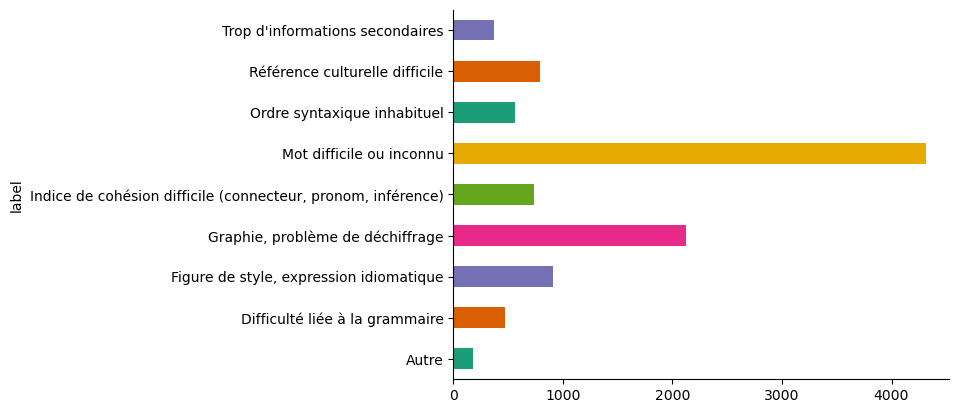

In [13]:
df_all_annotations.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
# Load local JSON annotations
with open('../data/annotations.json', 'r') as f:
    json_data = json.load(f)
local_df = pd.DataFrame(json_data)

# Load global annotations
file_path = '../data/Qualtrics_Annotations_B_1_1.csv'
global_df = pd.read_csv(file_path, index_col="text_indice", delimiter="\t")
global_df = global_df[~global_df.index.duplicated(keep='first')]
global_df = global_df[['text', 'gold_score_20_label']]
global_df['classe'] = global_df['gold_score_20_label'].map(classe2CECR)

# Match texts and assign labels
indexes = []
for local_text in local_df['text']:
    matching_indexes = global_df[global_df['text'] == local_text].index.tolist()
    indexes.append(matching_indexes[0] if matching_indexes else -1)

local_df['text_indice'] = indexes
local_df['gold_score_20_label'] = local_df['text_indice'].apply(
    lambda x: global_df.at[x, 'gold_score_20_label'] if x != -1 else None
)
local_df['classe'] = local_df['gold_score_20_label'].map(classe2CECR)

In [12]:
global_df['gold_score_20_label'].value_counts()

gold_score_20_label
Facile         212
Accessible     198
+Complexe       32
Très Facile     19
Name: count, dtype: int64

In [13]:
df_annotations_all = local_df['annotations'].apply(lambda x: json_normalize(x))
df_all_annotations = pd.concat([df for df in df_annotations_all], ignore_index=True)

In [14]:
df_all_annotations

,text,start,end,label,annotators,confidence
0,collectif,209,218,Mot difficile ou inconnu,[VAV],0.33
1,faciès.,619,626,Mot difficile ou inconnu,"[EMD, VAV, VIL]",1.00
2,antiraciste.,78,90,"Graphie, problème de déchiffrage",[VIL],0.33
3,elle ne s'en donne pas les moyens.,747,781,Ordre syntaxique inhabituel,[VAV],0.33
4,moyens.,774,781,"Graphie, problème de déchiffrage",[EMD],0.33
...,...,...,...,...,...,...
8980,Ingrédients,180,191,"Graphie, problème de déchiffrage",[VAV],0.33
8981,Ingrédients,180,191,Mot difficile ou inconnu,[VIL],0.33
8982,brin,235,239,Mot difficile ou inconnu,[VAV],0.33
8983,millilitres,255,266,Mot difficile ou inconnu,[VIL],0.33


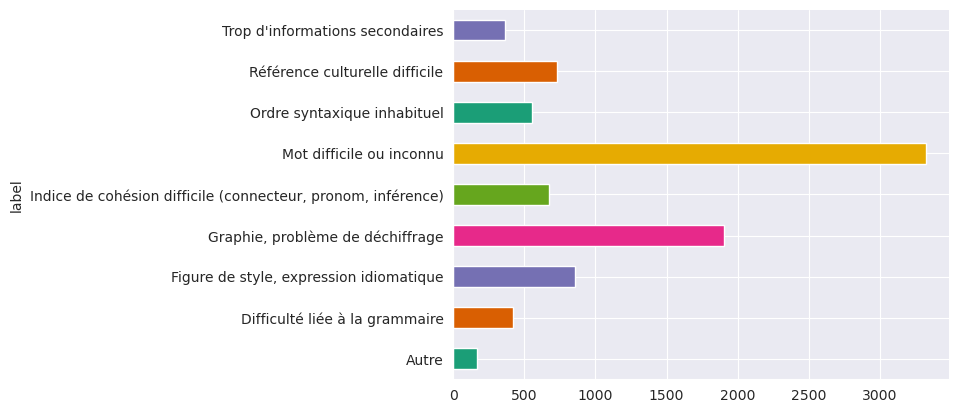

In [15]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df_all_annotations.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

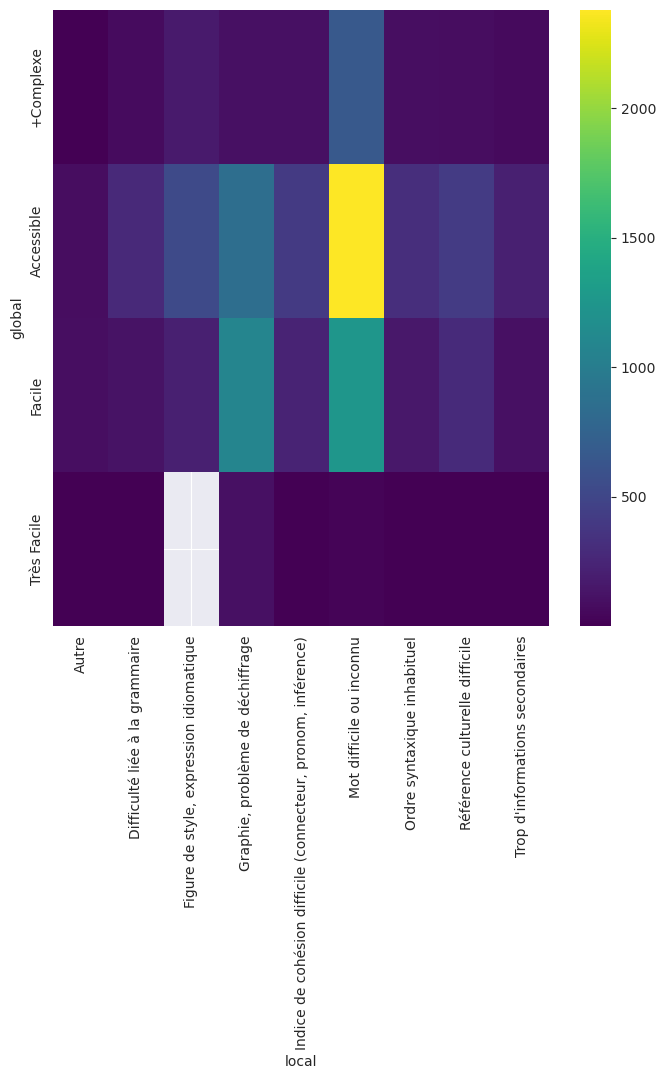

In [40]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['gold_score_20_label'].value_counts()
    for x_label, grp in df_all_annotations.groupby('label')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('label')
_ = plt.ylabel('global')
_ = plt.xlabel('local')

In [41]:
df_all_annotations.columns

Index(['text', 'label', 'gold_score_20_label', 'text_indice'], dtype='object')

In [16]:
# Apply json_normalize to each row of the annotations column and keep gold_score_20_label
def normalize_annotations(row):
    annotations_df = json_normalize(row['annotations'])
    # Repeat the gold_score_20_label for each annotation in the row
    annotations_df['gold_score_20_label'] = row['gold_score_20_label']
    return annotations_df

# Apply the normalization function to each row and combine the results
df_annotations_all = local_df.apply(normalize_annotations, axis=1)

# Concatenate all the DataFrames into a single DataFrame
df_all_annotations = pd.concat(df_annotations_all.tolist(), ignore_index=True)


In [17]:
df_all_annotations

,text,start,end,label,annotators,confidence,gold_score_20_label
0,collectif,209,218,Mot difficile ou inconnu,[VAV],0.33,Accessible
1,faciès.,619,626,Mot difficile ou inconnu,"[EMD, VAV, VIL]",1.00,Accessible
2,antiraciste.,78,90,"Graphie, problème de déchiffrage",[VIL],0.33,Accessible
3,elle ne s'en donne pas les moyens.,747,781,Ordre syntaxique inhabituel,[VAV],0.33,Accessible
4,moyens.,774,781,"Graphie, problème de déchiffrage",[EMD],0.33,Accessible
...,...,...,...,...,...,...,...
8980,Ingrédients,180,191,"Graphie, problème de déchiffrage",[VAV],0.33,Facile
8981,Ingrédients,180,191,Mot difficile ou inconnu,[VIL],0.33,Facile
8982,brin,235,239,Mot difficile ou inconnu,[VAV],0.33,Facile
8983,millilitres,255,266,Mot difficile ou inconnu,[VIL],0.33,Facile


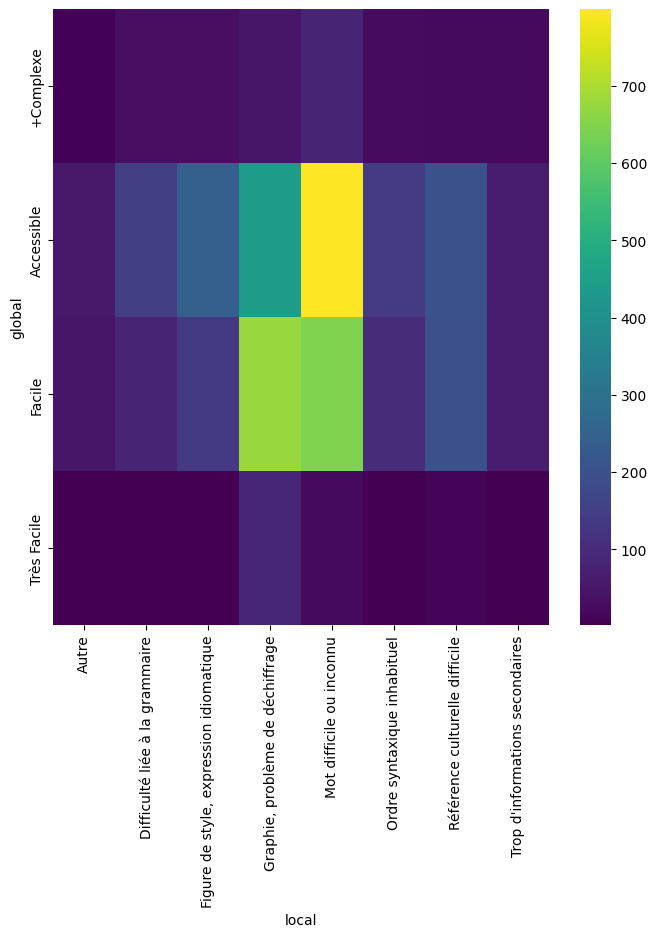

In [44]:
# @title label vs gold_score_20_label

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['gold_score_20_label'].value_counts()
    for x_label, grp in df_all_annotations.groupby('label')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('label')
_ = plt.ylabel('global')
_ = plt.xlabel('local')

In [45]:
df_2dhist

,Autre,Difficulté liée à la grammaire,"Figure de style, expression idiomatique","Graphie, problème de déchiffrage",Mot difficile ou inconnu,Ordre syntaxique inhabituel,Référence culturelle difficile,Trop d'informations secondaires
gold_score_20_label,,,,,,,,
+Complexe,6,33,33,46,80,24,23,23
Accessible,53,151,239,438,799,142,201,65
Facile,48,80,135,676,646,99,196,62
Très Facile,3,3,4,89,21,5,9,2


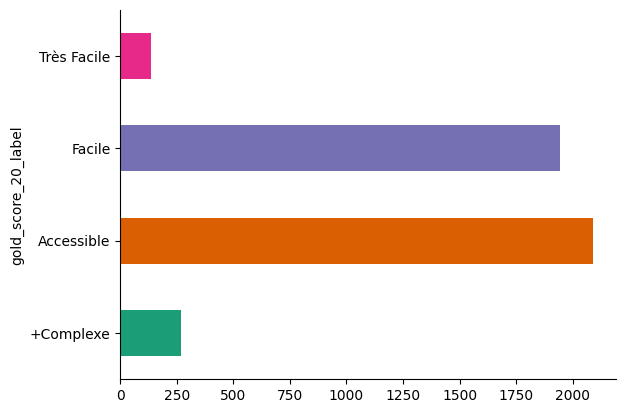

In [42]:
# @title gold_score_20_label

from matplotlib import pyplot as plt
import seaborn as sns
df_all_annotations.groupby('gold_score_20_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)